In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# on kaggle
import numpy as np #
import pandas as pd #

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = (os.path.join(dirname, filename))

In [3]:
#on local 
filepath = '../drivedata/coursea_data.csv'

In [4]:
# on Google drive
filepath = "/content/drive/My Drive/Colab Notebooks/coursera/data/coursea_data.csv"

In [5]:
df = pd.read_csv(filepath, index_col=0)

## Items
- course_title : Contains the course title.
- course_organization : It tells which organization is conducting the courses.
- courseCertificatetype : It has details about what are the different certifications available in courses.
- course_rating : It has the ratings associated with each course.
- course_difficulty : It tells about how difficult or what is the level of the course.
- coursestudentsenrolled : It has the number of students that are enrolled in the course.

## Check roughly

In [6]:
from collections import defaultdict
dct_convert_unit = defaultdict(lambda:0)
dct_convert_unit['k']  = 1000
dct_convert_unit['m']  = 1000*1000

df['course_students_enrolled_unit'] = df['course_students_enrolled'].str[-1].apply(lambda x : dct_convert_unit[x])
df['course_students_enrolled'] = df['course_students_enrolled'].str[:-1].astype(float)
df['course_students_enrolled'] = df['course_students_enrolled'] * df['course_students_enrolled_unit'] 
del df['course_students_enrolled_unit'] 

In [7]:
ls_course_Certificate_type = ['COURSE','SPECIALIZATION' ,'PROFESSIONAL CERTIFICATE']
ls_course_difficulty = [ 'Beginner', 'Intermediate', 'Advanced','Mixed']

In [8]:
df.shape[0]

891

In [9]:
for _col  in df.columns:
    if df[_col].dtype == 'object':  
        display(pd.DataFrame(df[_col].value_counts()))

,course_title
Machine Learning,2
Developing Your Musicianship,2
Marketing Digital,2
Introduction to CSS3,1
Probability and Statistics: To p or not to p?,1
...,...
Algorithms for Battery Management Systems,1
Introduction to Statistics & Data Analysis in Public Health,1
Corporate Finance Essentials,1
Autodesk CAD/CAM for Manufacturing,1


,course_organization
University of Pennsylvania,59
University of Michigan,41
Google Cloud,34
Johns Hopkins University,28
Duke University,28
...,...
Tsinghua University,1
"Birkbeck, University of London",1
ESADE Business and Law School,1
University of New Mexico,1


,course_Certificate_type
COURSE,582
SPECIALIZATION,297
PROFESSIONAL CERTIFICATE,12


,course_difficulty
Beginner,487
Intermediate,198
Mixed,187
Advanced,19


In [10]:
for _col  in df.columns:
    if df[_col].dtype == 'object':  
        display(pd.DataFrame(df[_col].value_counts(normalize=True)*100).cumsum())

,course_title
Machine Learning,0.224467
Developing Your Musicianship,0.448934
Marketing Digital,0.673401
Introduction to CSS3,0.785634
Probability and Statistics: To p or not to p?,0.897868
...,...
Algorithms for Battery Management Systems,99.551066
Introduction to Statistics & Data Analysis in Public Health,99.663300
Corporate Finance Essentials,99.775533
Autodesk CAD/CAM for Manufacturing,99.887767


,course_organization
University of Pennsylvania,6.621773
University of Michigan,11.223345
Google Cloud,15.039282
Johns Hopkins University,18.181818
Duke University,21.324355
...,...
Tsinghua University,99.551066
"Birkbeck, University of London",99.663300
ESADE Business and Law School,99.775533
University of New Mexico,99.887767


,course_Certificate_type
COURSE,65.319865
SPECIALIZATION,98.653199
PROFESSIONAL CERTIFICATE,100.000000


,course_difficulty
Beginner,54.657688
Intermediate,76.879910
Mixed,97.867565
Advanced,100.000000


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
df.sort_values(by="course_students_enrolled",ascending=True)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500.0
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600.0
462,Blockchain Revolution in Financial Services,INSEAD,SPECIALIZATION,4.6,Beginner,1600.0
373,Healthcare Law,University of Pennsylvania,SPECIALIZATION,4.7,Intermediate,1700.0
856,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,COURSE,4.9,Beginner,1700.0
...,...,...,...,...,...,...
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0


## Check categorical features


### certification type and difficulty
- Course > Sepcial >> Pro
  - Ex. 
      - Course : *Marchine Learning*
      - SP : *Deep Learning*
      - Pro : *IBM Data Science* 
  - <u>Maybe related to difficulty?</u>
- Certification type and difficulty are linked?
  - Heat map:
    - Heat map prove below.

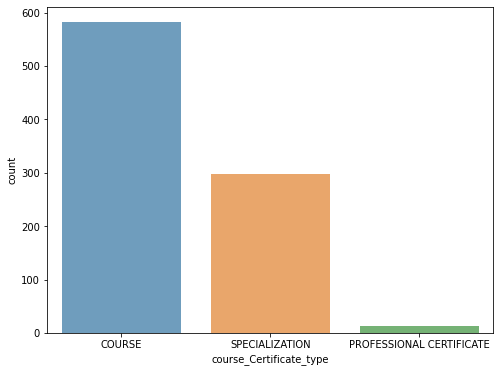

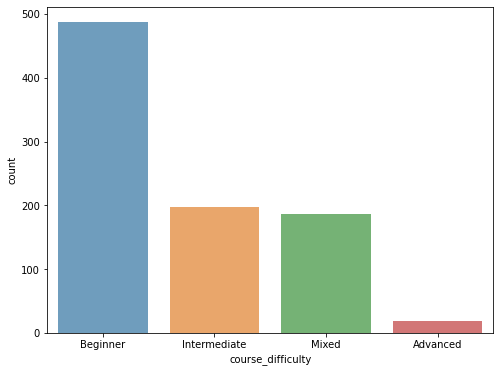

In [13]:
for _col  in ['course_Certificate_type','course_difficulty']:   
    fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
    sns.countplot(x=_col, data=df, ax= ax, order = df[_col].value_counts().index, alpha=0.7)

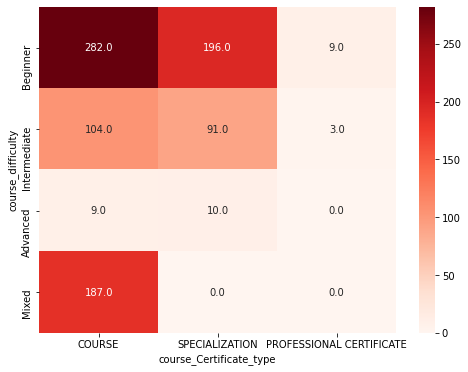

In [14]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
# sns.countplot(x='course_Certificate_typea', hue ='course_difficulty', order = ls_course_Certificate_type,hue_order=ls_course_difficulty,  data=df, ax= ax, alpha=0.7)
# ax.legend(loc='upper right')
df_pivot_cert_difficult = df[['course_Certificate_type', 'course_difficulty']].pivot_table(
        index='course_difficulty', columns='course_Certificate_type',
        aggfunc=len, fill_value=0)
df_pivot_cert_difficult = df_pivot_cert_difficult.loc[ls_course_difficulty,  ls_course_Certificate_type]
sns.heatmap(df_pivot_cert_difficult, annot=True, fmt="1.1f",cmap="Reds")


### Rating distribute

- course_difficulty
  - Just by looking, difficulty related to rating. 
    - Ex. this course is soooo difficult! I hate this course... orz 
  - But mean and std in each difficulty are almost same.
    - it mean organizer set up course content cocommensurate with difficulty in many course
    - 0.1 of distance is large different???
- course_Certficate
  - Same as below
    - But a #Pro is very few. I cannot affirm this analysis


course_rating,3.3,3.7,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
course_difficulty,,,,,,,,,,,,,,
Advanced,0,0,0,0,0,1,1,2,5,0,5,4,1,0
Beginner,0,0,0,0,1,4,10,16,40,107,141,129,38,1
Intermediate,0,1,2,2,0,2,2,13,25,32,60,46,12,1
Mixed,1,0,0,0,0,3,2,3,10,29,45,77,17,0


,mean,std
course_difficulty,,
Advanced,4.600000,0.194365
Beginner,4.680903,0.141947
Intermediate,4.646465,0.188939
Mixed,4.708556,0.170803


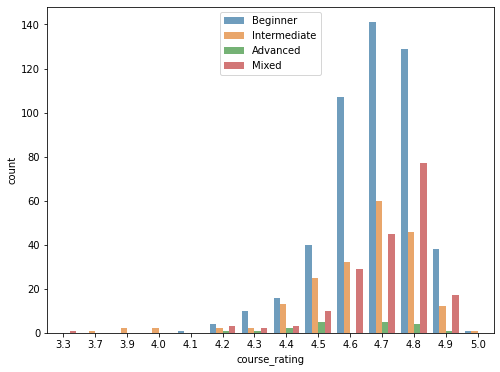

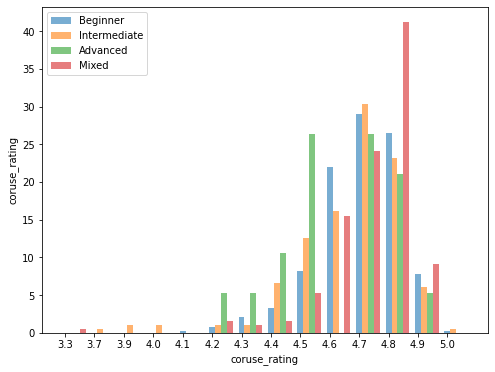

In [15]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
sns.countplot(x='course_rating', data=df, ax= ax,hue = 'course_difficulty', order = sorted(list(set(df.course_rating))), hue_order=ls_course_difficulty, alpha=0.7)
ax.legend()
df_rating_dist =  df[['course_rating', 'course_difficulty']] \
    .pivot_table(
        columns='course_difficulty', index='course_rating',
        aggfunc=len, fill_value=0)

display(df_rating_dist.T)


df_rating_dist = 100*df_rating_dist/df_rating_dist.sum()
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
ls_xticklabel = list(df_rating_dist.index)
for i , _col in enumerate(ls_course_difficulty):
    ax.bar(
        list(map(lambda x: (0.2)*i+x, range(len((ls_xticklabel))))), 
        height=df_rating_dist[_col].values,
        label=_col,
        alpha=0.6, width=0.2)
ax.set_xticks(range(len((ls_xticklabel))))
ax.set_xticklabels(ls_xticklabel)
plt.xlabel('coruse_rating')
plt.ylabel('coruse_rating')
ax.legend()

df_rating_dist =  df[['course_rating', 'course_difficulty']] \
  .groupby('course_difficulty')['course_rating'].agg(["mean","std"])
display(df_rating_dist)

course_rating,3.3,3.7,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
course_Certificate_type,,,,,,,,,,,,,,
COURSE,1,0,0,2,0,6,5,13,38,92,162,201,61,1
PROFESSIONAL CERTIFICATE,0,0,0,0,0,0,0,0,0,6,2,2,2,0
SPECIALIZATION,0,1,2,0,1,4,10,21,42,70,87,53,5,1


,mean,std
course_Certificate_type,,
COURSE,4.707045,0.151647
PROFESSIONAL CERTIFICATE,4.700000,0.120605
SPECIALIZATION,4.618182,0.167874


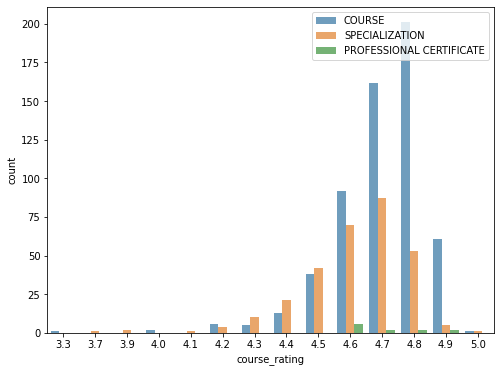

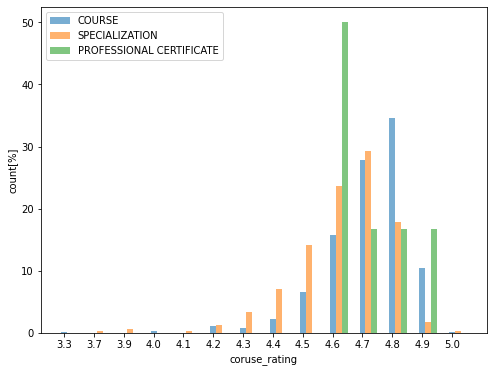

In [16]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
sns.countplot(x='course_rating', data=df, ax= ax,hue = 'course_Certificate_type', order = sorted(list(set(df.course_rating))), hue_order=ls_course_Certificate_type, alpha=0.7)
ax.legend()
df_rating_dist =  df[['course_rating', 'course_Certificate_type']] \
    .pivot_table(
        columns='course_Certificate_type', index='course_rating',
        aggfunc=len, fill_value=0)

display(df_rating_dist.T)


df_rating_dist = 100*df_rating_dist/df_rating_dist.sum()
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
ls_xticklabel = list(df_rating_dist.index)
for i , _col in enumerate(ls_course_Certificate_type):
    ax.bar(
        list(map(lambda x: (0.2)*i+x, range(len((ls_xticklabel))))), 
        height=df_rating_dist[_col].values,
        label=_col,
        alpha=0.6, width=0.2)
ax.set_xticks(range(len((ls_xticklabel))))
ax.set_xticklabels(ls_xticklabel)
plt.xlabel('coruse_rating')
plt.ylabel('count[%]')
ax.legend()

df_rating_dist =  df[['course_rating', 'course_Certificate_type']] \
  .groupby('course_Certificate_type')['course_rating'].agg(["mean","std"])
display(df_rating_dist)


### course_students_enrolled
- course_students_enrolled distribution is long tail
  - convet log scale
- Break down analysis same as below
  - couse = SP < Pro
    - #Pro is few.　But Many pro course have many students when looking each data      
  - #student is not different between type of difficulty
  - But  I want to know "MIX", what is meaning of MIX?

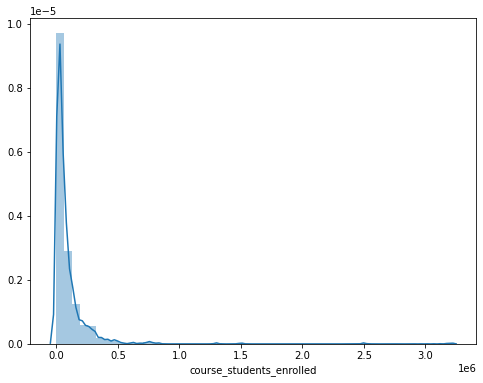

In [60]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
_cert_type = 'PROFESSIONAL CERTIFICATE'
sns.distplot(df.loc[:, "course_students_enrolled"],ax=ax, label = _cert_type)

In [59]:
_cert_type

'PROFESSIONAL CERTIFICATE'

In [19]:
df_large = df[df.course_students_enrolled > 500000] \
  .sort_values(by="course_students_enrolled", ascending =False)
print(df_large.shape[0])
display(df_large)

14


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
44,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790000.0
175,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760000.0
40,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750000.0
15,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740000.0
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690000.0


In [20]:
df_small = df[df.course_students_enrolled < 10000]
print(df_small.shape[0])
display(df_small)

118


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2400.0
283,AI for Medical Prognosis,deeplearning.ai,COURSE,4.6,Intermediate,4000.0
819,Aboriginal Worldviews and Education,University of Toronto,COURSE,4.7,Mixed,6600.0
612,Access Controls,(ISC)²,COURSE,4.6,Beginner,2900.0
...,...,...,...,...,...,...
865,Unity Certified Programmer Exam Preparation,Unity,SPECIALIZATION,4.5,Intermediate,6100.0
882,University Teaching,The University of Hong Kong,COURSE,4.8,Beginner,9500.0
638,Unraveling the Cycling City,University of Amsterdam,COURSE,4.9,Intermediate,3900.0
543,What is Compliance?,University of Pennsylvania,COURSE,4.8,Mixed,6200.0


In [21]:
import copy

df['log_course_students_enrolled'] = np.log10(df.course_students_enrolled)

,mean,std,count,min,max
course_Certificate_type,,,,,
COURSE,4.630443,0.512007,582,3.176091,6.505150
PROFESSIONAL CERTIFICATE,5.000007,0.691166,12,3.414973,5.681241
SPECIALIZATION,4.580838,0.598373,297,3.204120,6.176091


,course_title,course_organization,course_students_enrolled
56,Arizona State University TESOL,Arizona State University,150000.0
9,Cloud Engineering with Google Cloud,Google Cloud,310000.0
22,Data Engineering with Google Cloud,Google Cloud,120000.0
25,Google IT Automation with Python,Google,93000.0
4,Google IT Support,Google,350000.0
34,IBM AI Engineering,IBM,140000.0
12,IBM Applied AI,IBM,220000.0
0,IBM Data Science,IBM,480000.0
160,SAS Programmer,SAS,370000.0
393,SAS Visual Business Analytics,SAS,2600.0


Text(0, 0.5, 'p')

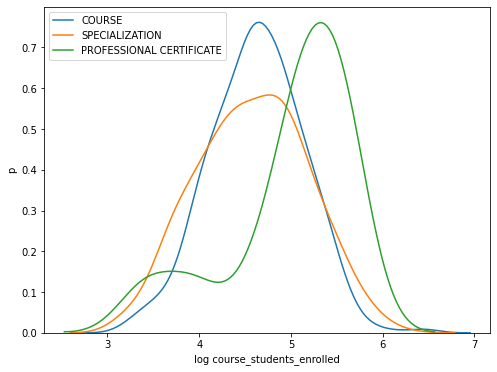

In [22]:
display(pd.DataFrame(df.groupby('course_Certificate_type')['log_course_students_enrolled'].agg(['mean','std','count','min','max'])))
display(df.loc[df.course_Certificate_type == "PROFESSIONAL CERTIFICATE", ["course_title","course_organization","course_students_enrolled"]])
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
for _cert_type in ls_course_Certificate_type:
  sns.kdeplot(df.loc[df.course_Certificate_type == _cert_type, "log_course_students_enrolled"],ax=ax, label = _cert_type)
# plt.xlim(-10000,500000)
plt.xlabel('log course_students_enrolled')
plt.ylabel('p')



,mean,std,count,min,max
course_difficulty,,,,,
Advanced,66547.368421,82262.211984,19,3500.0,320000.0
Beginner,81974.948665,127270.770733,487,1500.0,1500000.0
Intermediate,73264.141414,104206.139306,198,1600.0,690000.0
Mixed,133633.155080,318544.975762,187,2300.0,3200000.0


Text(0, 0.5, 'p')

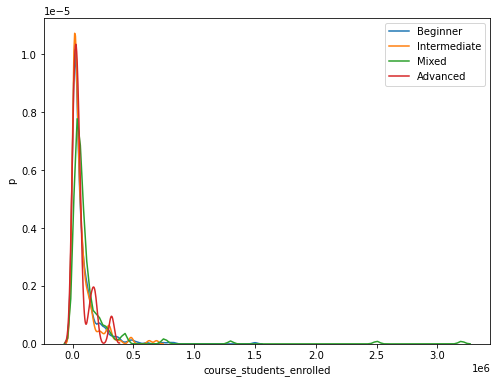

In [23]:
display(pd.DataFrame(df.groupby('course_difficulty')['course_students_enrolled'].agg(['mean','std','count','min','max'])))
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
for _diff in ['Beginner', 'Intermediate', 'Mixed', 'Advanced']:
  sns.kdeplot(df.loc[df.course_difficulty == _diff, "course_students_enrolled"],ax=ax, label = _diff)
# plt.xlim(-10000,500000)
plt.legend()
plt.xlabel('course_students_enrolled')
plt.ylabel('p')

### course_organization
- course_organization distribution  has long tail
- Focus in # of held 
  - Classify 2 class ... high vs low
    - high held orgnizer got more users than lower class

mean: 5.785714285714286


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153]),
 <a list of 154 Text major ticklabel objects>)

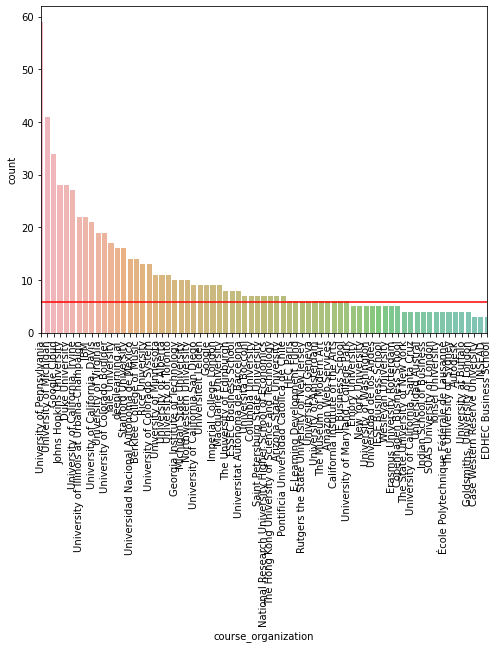

In [28]:
_col ="course_organization"
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
sns.countplot(x=_col, data=df, order=df[_col].value_counts().index, ax= ax, alpha=0.7)
df_org = pd.DataFrame(df[_col].value_counts())
mean_part = df_org.mean().values[0]
print("mean: {0}".format(mean_part))
ax.hlines(y=mean_part, xmin=0, xmax=ax.get_xlim()[1], color='r')
ax.set(xlim=(0,70))
plt.xticks(rotation= 90)

In [29]:
df_org = df_org.reset_index()
df_org.columns = ['course_organization', 'n_held']
df_org['course_organization_type'] = 'low_held'
df_org.loc[df_org['n_held']>mean_part,'course_organization_type']  = 'high_held'

In [30]:
df_with_held = pd.merge(df  , df_org, on='course_organization', how='left')
sns.pairplot(df_with_held,hue='course_organization_type',palette="husl")

In [ ]:
print("course_students_enrolled")
df_with_held.groupby(['course_organization_type'])['course_students_enrolled'].agg(['mean','count','min','max'])

course_students_enrolled


,mean,count,min,max
course_organization_type,,,,
high_held,103094.879518,664,1600.0,3200000.0
low_held,53862.995595,227,1500.0,400000.0


### course_title
- titles in these course has many languages.
  - EN, RU, and so on
  - => we detect langeage of title and normarize it
  - Language detection using "cld2" is not correct completely. (Off course, theis package is amazing and very usefull!)
    - -> I pick up ONLY english and analyze. 
- As following graph, these words are most frequent words in title,
  - I deem that these words has some class, for instance programming, biz and so on ..., if you have time to analyze more, could you try LDA?
  - Finally, I pick up words which appear more than 20title, I define these words as "top words",  then how many top words does title include? and how does #top words effect #user?
    - Uhh... top words have power to attract user. 

In [32]:
!pip install gensim
!pip install -q wordcloud
!pip install pycld2
import wordcloud
import nltk
import gensim
from gensim import corpora
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import unicodedata
import re
import string
import pycld2 as cld2

     |████████████████████████████████| 41.4MB 101kB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp36-cp36m-linux_x86_64.whl size=9833541 sha256=89a92828ecd7a093e796d7b825fb20553b40fed8027ed98151d23637d577efea
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a3dbcfc70498100de11079
Successfully built pycld2
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [38]:
"""
Set up NLP
"""

# Constants
# POS (Parts Of Speech) for: nouns, adjectives, verbs and adverbs
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

# Get stopwords, stemmer and lemmatizer
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Remove accents function
# (Normalization Form Compatibility Decomposition)
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

def tokenize(sentence):
    # Tokenize by sentense:
    tokens = [word.lower() for sent in nltk.sent_tokenize(sentence) for word in nltk.word_tokenize(sent)]
    ls_tokenized = []
    for token in tokens:

        # Remove accents
        t = remove_accents(token)

        # Remove punctuation
        t = str(t).translate(string.punctuation)

        #remove stop word
        if t in stopwords:
            continue

        # remove signal etc...
        if not re.search(RE_VALID, t):
            continue

        # #remove too short
        # if len(t) < MIN_STR_LEN:
        #   continue

        #stem and lemma
        # t = stemmer.stem(t)
        # t = lemmatizer.lemmatize(t)#, pos=DI_POS_TYPES[])

        ls_tokenized.append(t)
    return ls_tokenized

In [43]:
# Detect monther language of title
df['course_title_lang'] = [cld2.detect(_title)[2][0][1]  for _title in df.course_title.values]

In [44]:
print("course_students_enrolled")
df.groupby(['course_title_lang'])['course_students_enrolled'].agg(['mean','count','min','max']).sort_values(by='count')

course_students_enrolled


,mean,count,min,max
course_title_lang,,,,
ab,21000.000000,1,21000.0,21000.0
nl,68000.000000,1,68000.0,68000.0
rm,110000.000000,1,110000.0,110000.0
sl,51000.000000,1,51000.0,51000.0
vo,120000.000000,1,120000.0,120000.0
war,27000.000000,1,27000.0,27000.0
gl,28500.000000,2,13000.0,44000.0
la,50200.000000,3,6600.0,110000.0
pt,47166.666667,3,4500.0,120000.0


In [52]:
df_en = df[df.course_title_lang=='en']
dct_title = {i :tokenize(_token) for i, _token in enumerate(df_en.course_title.values)}
df_words = pd.DataFrame(nltk.FreqDist([flatten for inner in dct_title.values() for flatten in inner]),index=['count']).T.sort_values(by='count',ascending=False)

1133


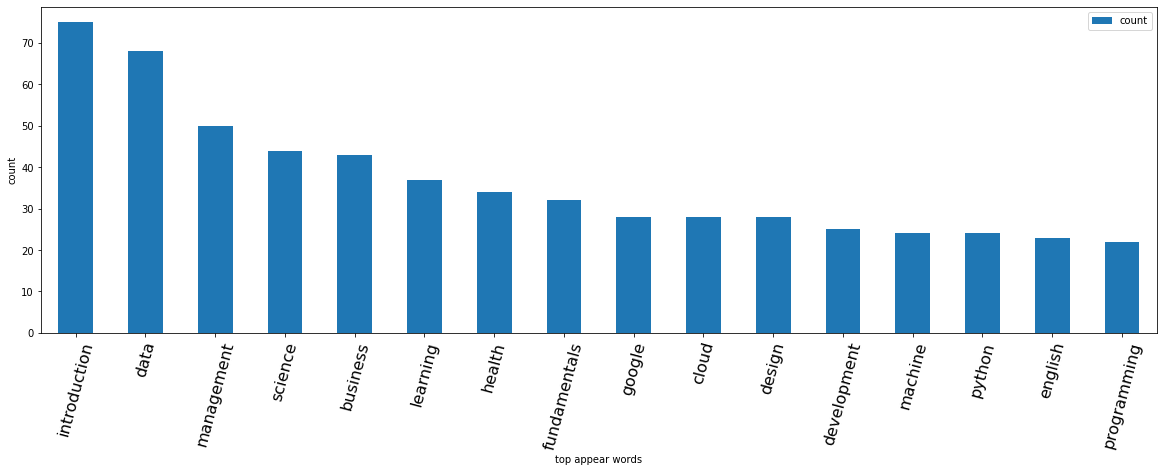

In [53]:
fig, ax = plt.subplots(figsize=(20,6), facecolor='w')
df_words[df_words['count']>20].plot.bar(ax=ax)
plt.xticks(rotation =75,fontsize=16)
plt.xlabel('top appear words')
plt.ylabel('count')
print(df_words.shape[0])

In [76]:
ls_top_words = list(df_words[df_words['count']>20].index)

In [77]:
df_top_words=pd.DataFrame(
    {i :len(list(set(ls_top_words) & set(ls_words) )) for i , ls_words in enumerate(dct_title.values())},
    index=['top_w_count']).T

In [78]:
df_with_top_words = pd.concat([df_en.reset_index(drop=True),df_top_words],axis=1)

Text(0, 0.5, 'mean #course_students_enrolled')

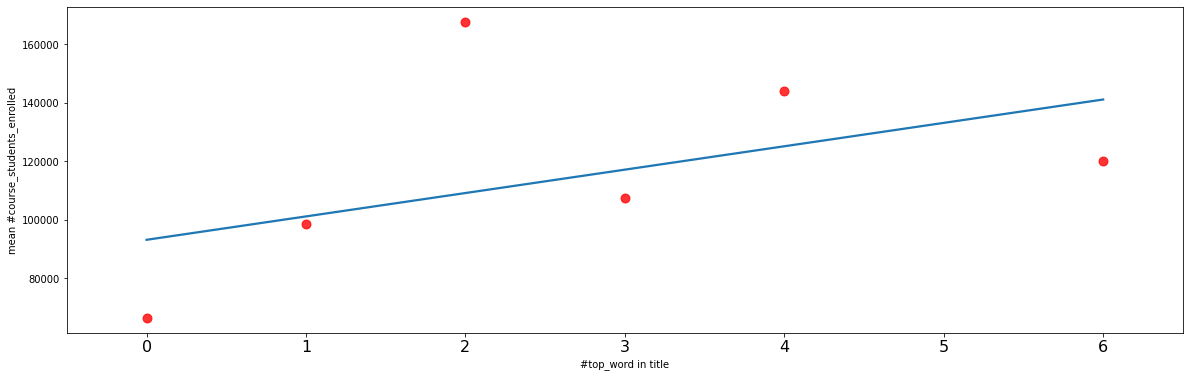

In [88]:
_col = 'top_w_count'
fig, ax = plt.subplots(figsize=(20,6), facecolor='w')
df_plot = df_with_top_words.groupby([_col])['course_students_enrolled'].agg(['mean']).reset_index()
sns.regplot(data=df_plot, x='top_w_count', y='mean',ax=ax,scatter_kws={"s": 80, "color":"r"}, robust=True, ci=None)
plt.xticks(rotation =0,fontsize=16)
plt.xlim(-0.5,6.5)
plt.xlabel('#top_word in title')
plt.ylabel('mean #course_students_enrolled')

#My 6hour(3day*2h) challenge : TIme out  